In [26]:
import numpy as np
import matplotlib.pyplot as plt

import os

import ehtplot.color

In [34]:
!ls /Users/gnwong/r/data/bhex/imgs/bhex_iharm_00_60

dump_00001000_3.npy dump_00001200_3.npy dump_00001400_3.npy dump_00001600_3.npy
dump_00001100_3.npy dump_00001300_3.npy dump_00001500_3.npy dump_00001700_3.npy


In [38]:
fnames = ['dump_00004784_4.npy', 'dump_00005712_4.npy', 'dump_00009424_4.npy']

fnames = ['dump_00001000_3.npy', 'dump_00001200_3.npy', 'dump_00001400_3.npy', 'dump_00001600_3.npy', 'dump_00001100_3.npy', 'dump_00001300_3.npy', 'dump_00001500_3.npy', 'dump_00001700_3.npy']

basename = '/Users/gnwong/r/data/bhex/imgs/bhex_iharm_94_60'

 - loading dump_00001000_3.npy
 - loading dump_00001200_3.npy
 - loading dump_00001400_3.npy
 - loading dump_00001600_3.npy
 - loading dump_00001100_3.npy
 - loading dump_00001300_3.npy
 - loading dump_00001500_3.npy
 - loading dump_00001700_3.npy
 - saving


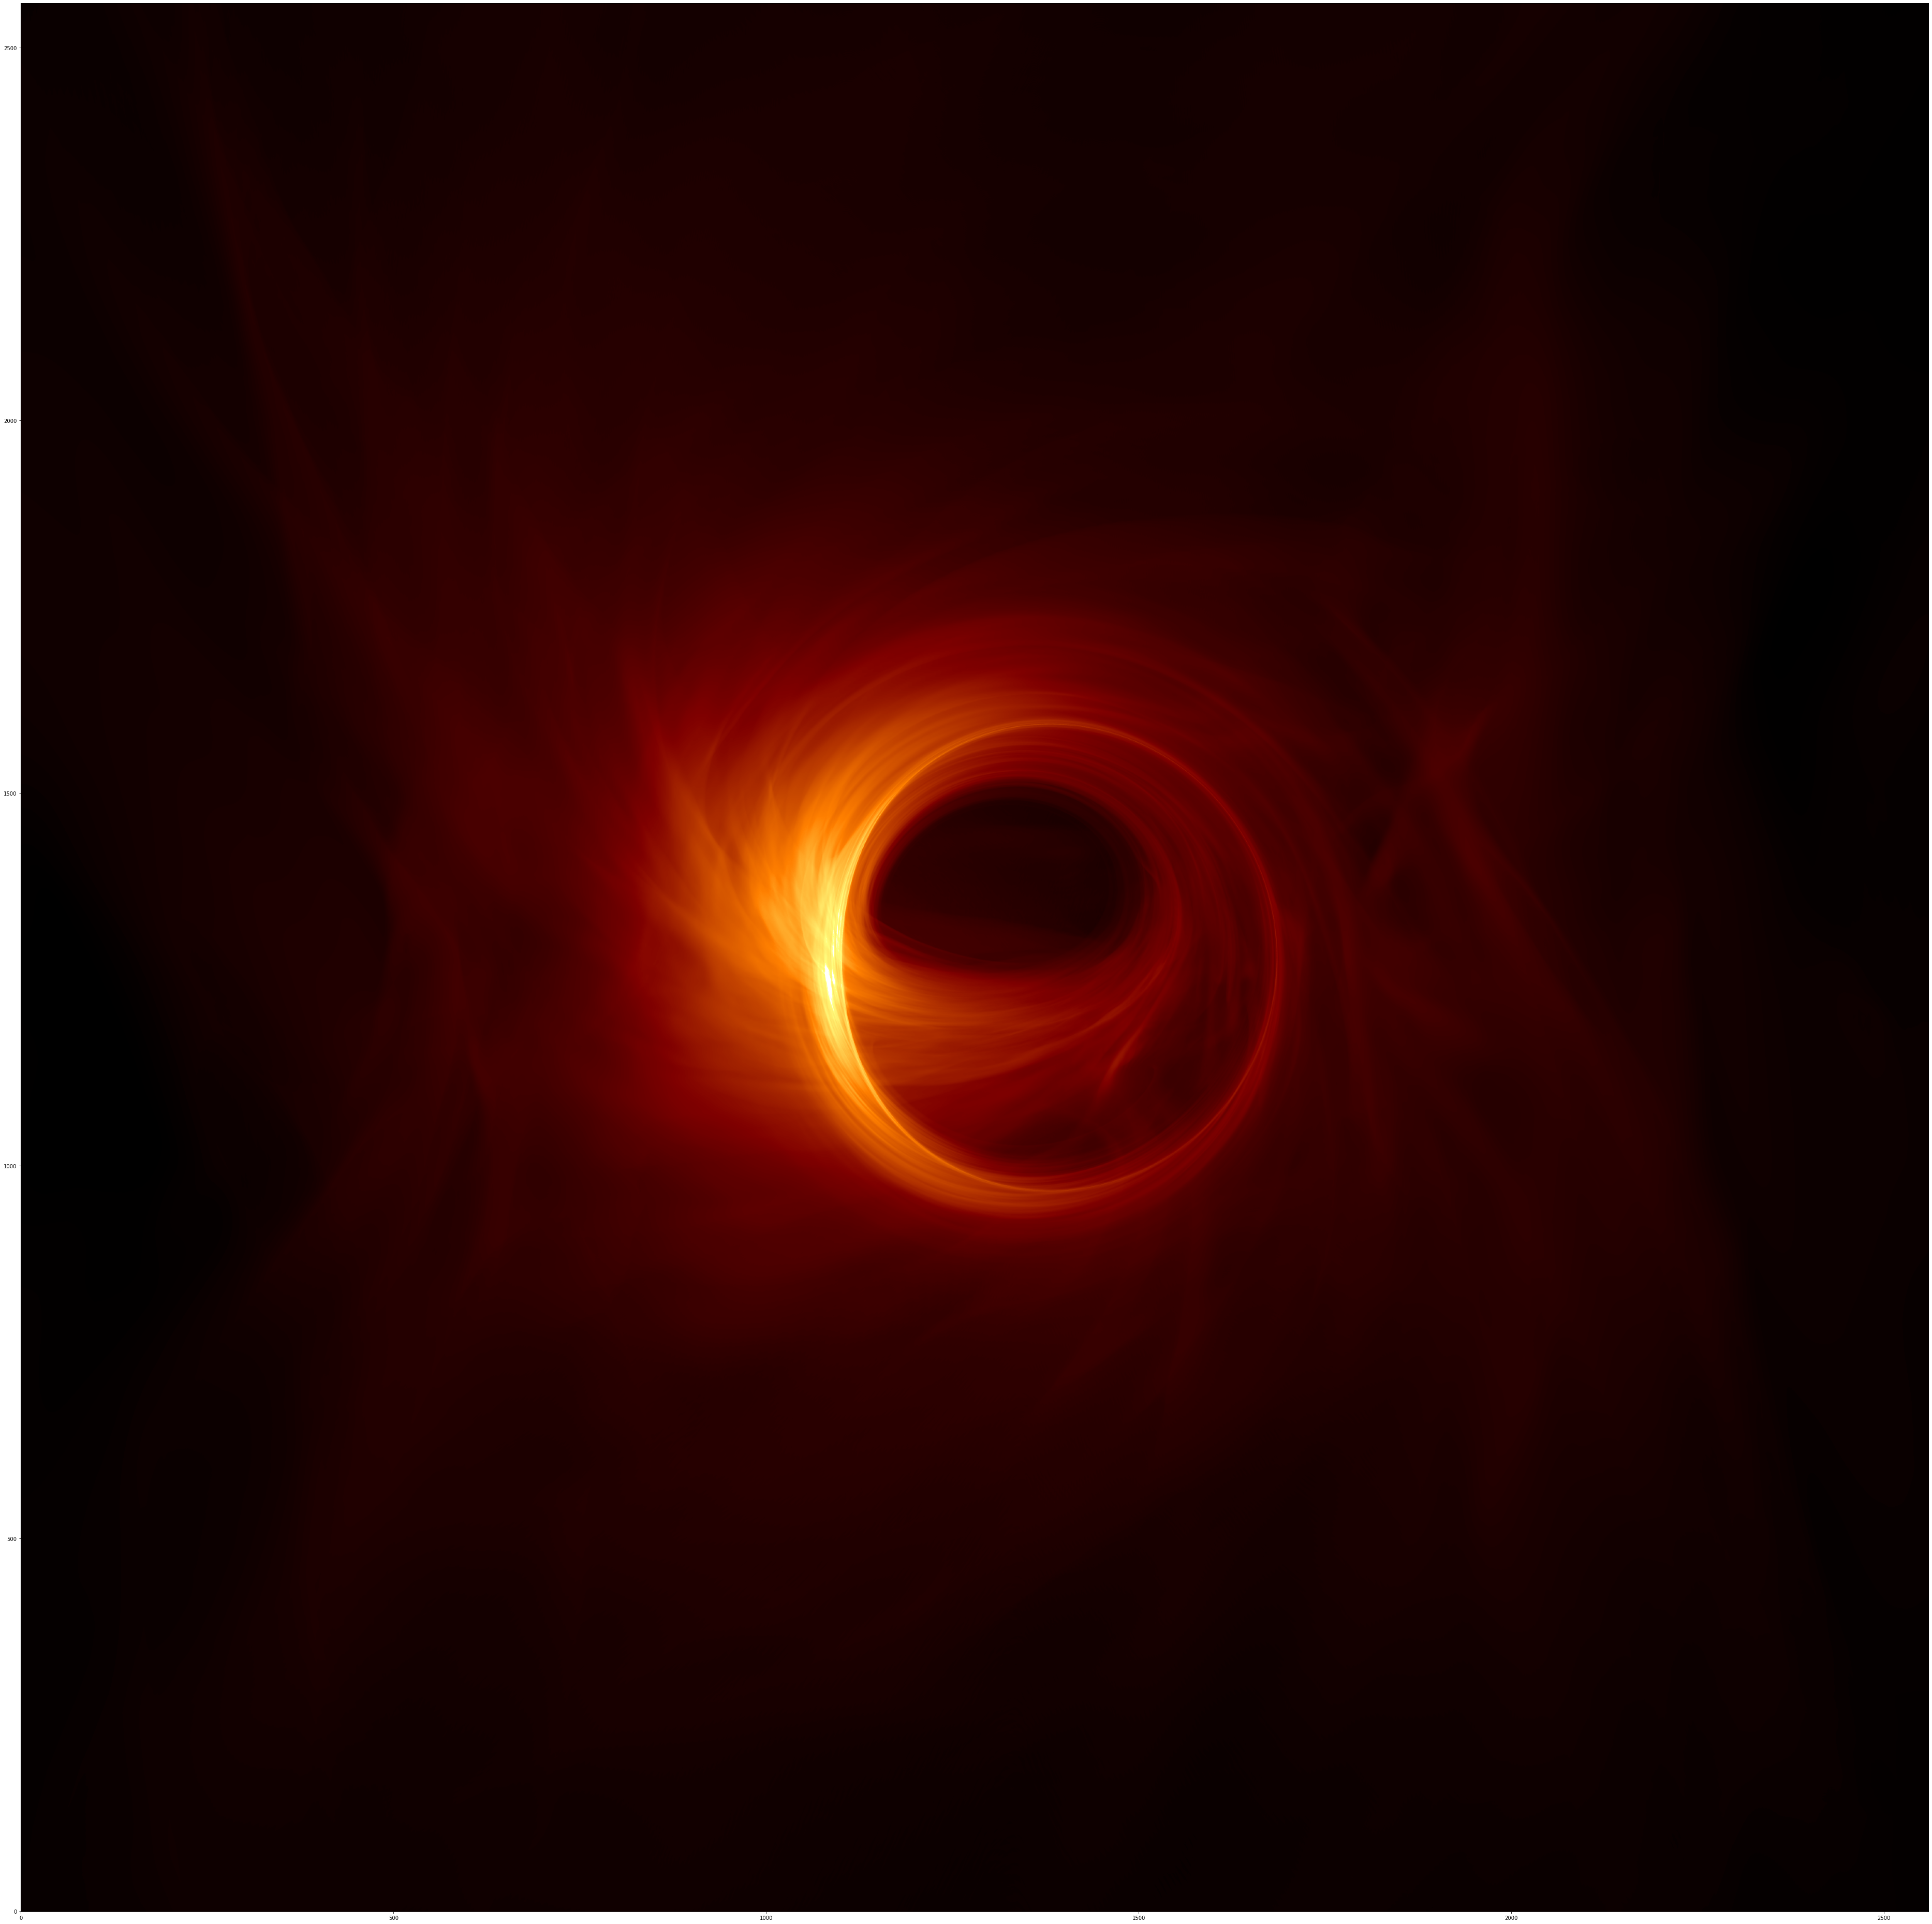

In [39]:
pdata = None
pdata_n000 = None

for fname in fnames:

    print(f' - loading {fname}')

    tfname = basename + '/' + fname
    tfname_n000 = basename + '/' + fname.replace('_4.npy', '_n000_4.npy')

    data = np.load(tfname, allow_pickle=True).item()

    idata = data['data']
    wsize = data['wsize']
    hsize= data['hsize']

    if pdata is None:
        pdata = np.zeros_like(idata)
        pdata_n000 = np.zeros_like(idata)

    pdata += idata.T
    pdata_n000 += np.load(tfname_n000, allow_pickle=True).item()['data'].T

imdata = pdata

pdata = np.power(imdata, 0.8) * 5.
pdata += np.power(imdata, 0.32) * 12.
pdata += np.power(imdata, 3) * 20

vmax = np.max(pdata) / np.sqrt(1.1)

fig = plt.figure(figsize=(wsize, hsize), facecolor='w')
ax1 = plt.subplot(1, 1, 1)
ax1.imshow(pdata, origin='lower', cmap='afmhot_u', vmin=0, vmax=vmax)
ax1.set_position([0, 0, 1, 1])

ofname = os.path.basename(basename)

print(' - saving')
plt.savefig(ofname + '.png', dpi=100)

In [37]:
!open .